### TAREA 2 - Limpieza y alistamiento de datos
### Cargo: Ingeniería de Datos: Nicolas Alvarez 

In [2]:
import pandas as pd
dataFrame = pd.read_csv('data.txt')
dataFrame["department"].unique()


array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [3]:
# Buscar duplicados
dataFrame.duplicated().sum() #Respuesta: 0

#Identificar errores estructurales
dataFrame.isnull().values.any()     #Anwser: True --> ¿Dónde están los datos nulos?
dataFrame.isnull().sum()   # 506 NaNs en la columna wip
DataFrame = dataFrame.dropna(inplace=False)
print("NaNs por cada fila del DataFrame: ")
DataFrame.isnull().sum()   # 0 NaNs en la columna wip

NaNs por cada fila del DataFrame: 


date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [4]:
DataFrame.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [5]:
DataFrame
#SE CREAN VARIABLES CATEGÓRICAS PARA QUARTER Y DAY
import pandas as pd
DataFrame['quarter_cat'] = DataFrame['quarter'].apply(lambda x: 1 if x == 'Quarter1' else 2)
df_binary = pd.get_dummies(DataFrame['day'], prefix='day')
df_binary = df_binary.astype(int)
DataFrame = pd.concat([DataFrame, df_binary], axis=1)

#desired_order = ['date', 'quarter', 'quarter_cat','department', 'day','team', 'targeted_productivity',
      # 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       #'no_of_style_change', 'no_of_workers', 'actual_productivity']

#DataFrame = DataFrame[desired_order]
DataFrame



C:\Users\Admin\AppData\Local\Temp\ipykernel_19108\1342618265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['quarter_cat'] = DataFrame['quarter'].apply(lambda x: 1 if x == 'Quarter1' else 2)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,no_of_style_change,no_of_workers,actual_productivity,quarter_cat,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,...,0,59.0,0.940725,1,0,0,0,1,0,0
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,...,0,30.5,0.800570,1,0,0,0,1,0,0
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,...,0,30.5,0.800570,1,0,0,0,1,0,0
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,...,0,56.0,0.800382,1,0,0,0,1,0,0
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,...,0,56.0,0.800125,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,...,0,59.0,0.750051,2,0,0,0,0,0,1
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,...,1,58.0,0.700557,2,0,0,0,0,0,1
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,...,1,57.0,0.700505,2,0,0,0,0,0,1
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,...,1,38.0,0.700246,2,0,0,0,0,0,1


In [28]:
DataFrame.to_csv("datosproyecto1")  #  Guardamos el dataframe en un archivo csv

In [6]:
#Crear datafrma para el departamento de Finishing

df_finishing = dataFrame[dataFrame["department"]=="finishing"]
df_finishing = df_finishing.drop(columns=["wip"])
df_finishing['quarter_cat'] = df_finishing['quarter'].apply(lambda x: 1 if x == 'Quarter1' else 2)
df_binary = pd.get_dummies(df_finishing['day'], prefix='day')
df_binary = df_binary.astype(int)
df_finishing = pd.concat([df_finishing, df_binary], axis=1)
df_finishing


,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,...,no_of_style_change,no_of_workers,actual_productivity,quarter_cat,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
18,1/1/2015,Quarter1,finishing,Thursday,11,0.70,4.15,1440,0,0.0,...,0,12.0,0.436326,1,0,0,0,1,0,0
602,2/4/2015,Quarter1,finishing,Wednesday,2,0.80,3.94,2160,0,0.0,...,0,18.0,0.966759,1,0,0,0,0,0,1
603,2/4/2015,Quarter1,finishing,Wednesday,1,0.80,3.94,1200,0,0.0,...,0,10.0,0.929183,1,0,0,0,0,0,1
604,2/4/2015,Quarter1,finishing,Wednesday,8,0.70,4.15,3000,0,0.0,...,0,25.0,0.915767,1,0,0,0,0,0,1
608,2/4/2015,Quarter1,finishing,Wednesday,7,0.70,3.94,960,0,0.0,...,0,8.0,0.779792,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,...,0,8.0,0.628333,2,0,0,0,0,0,1
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,...,0,8.0,0.625625,2,0,0,0,0,0,1
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,...,0,8.0,0.625625,2,0,0,0,0,0,1
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,...,0,15.0,0.505889,2,0,0,0,0,0,1


In [30]:
df_finishing.to_csv("finishing_datos")

In [7]:
DataFrame["quarter"].unique()
DataFrame["day"].unique()
DataFrame.columns.values

array(['date', 'quarter', 'department', 'day', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'quarter_cat', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype=object)

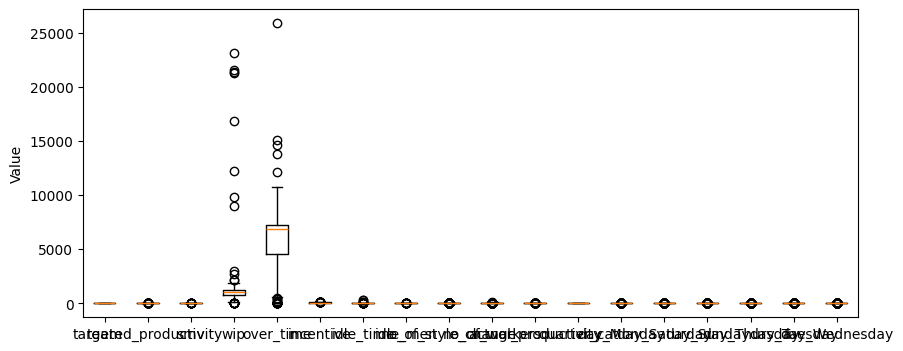

In [8]:
import matplotlib.pyplot as plt
import numpy as np
numeric_cols = DataFrame.select_dtypes(include=[np.number]).columns
fig, ax = plt.subplots(figsize=(10, 4)) 
ax.boxplot(DataFrame[numeric_cols].values)
ax.set_xticklabels(numeric_cols)
ax.set_ylabel('Value')
plt.show() 
#Ahora --> Hacer una para cada variable para que todo esté en escala

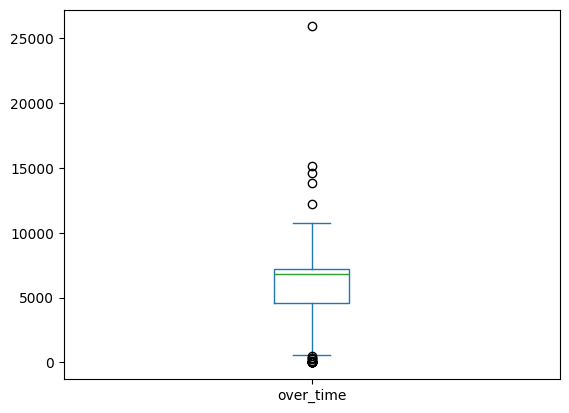

In [6]:
DataFrame["over_time"].plot.box()
plt.show() 

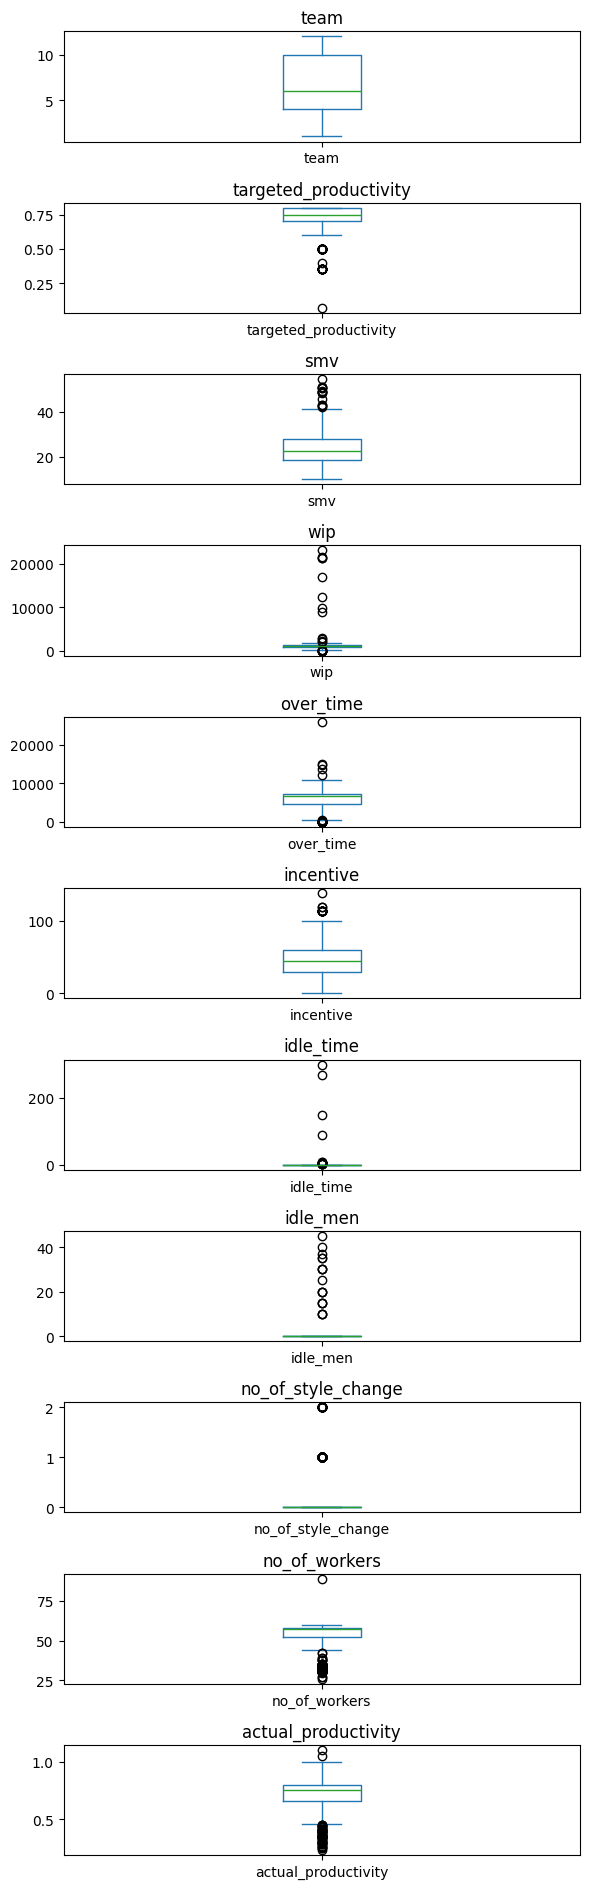

In [7]:
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(6, 19))
for i, col in enumerate(numeric_cols):
    DataFrame[col].plot.box(ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [9]:
import numpy as np
from scipy import stats
numeric_cols = DataFrame.select_dtypes(include=[np.number])
arr = numeric_cols.to_numpy()
z = np.abs(stats.zscore(arr))
outliers = DataFrame[z > 3]
outliers.describe() #97 outliers identificados
outliers 
### Dejemos los outliers y luego identificar por qué suceden


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,no_of_style_change,no_of_workers,actual_productivity,quarter_cat,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
59,1/4/2015,Quarter1,sweing,Sunday,5,0.70,45.67,884.0,6960,26,...,0,58.0,0.603432,1,0,0,1,0,0,0
138,1/8/2015,Quarter2,sweing,Thursday,12,0.80,11.61,548.0,15120,63,...,0,31.5,0.800107,2,0,0,0,1,0,0
146,1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,...,0,54.0,0.349951,2,0,0,0,1,0,0
146,1/8/2015,Quarter2,sweing,Thursday,11,0.35,12.52,287.0,25920,38,...,0,54.0,0.349951,2,0,0,0,1,0,0
147,1/8/2015,Quarter2,sweing,Thursday,5,0.70,42.41,724.0,10260,0,...,0,57.0,0.233705,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,3/1/2015,Quarter1,sweing,Sunday,7,0.80,30.10,934.0,6960,0,...,0,58.0,0.579511,1,0,0,1,0,0,0
1046,3/3/2015,Quarter1,sweing,Tuesday,2,0.40,15.28,157.0,5400,0,...,1,45.0,0.302770,1,0,0,0,0,1,0
1046,3/3/2015,Quarter1,sweing,Tuesday,2,0.40,15.28,157.0,5400,0,...,1,45.0,0.302770,1,0,0,0,0,1,0
1085,3/5/2015,Quarter1,sweing,Thursday,7,0.80,30.10,834.0,1200,0,...,0,59.0,0.366054,1,0,0,0,1,0,0


In [10]:
outliers.shape


(97, 22)

{5: 7, 12: 3, 11: 20, 4: 8, 10: 7, 2: 4, 1: 7, 7: 12, 6: 3, 9: 2, 8: 16, 3: 8}
El equipo que más aparece en los outliers: 11
(8, 16)
(7, 12)


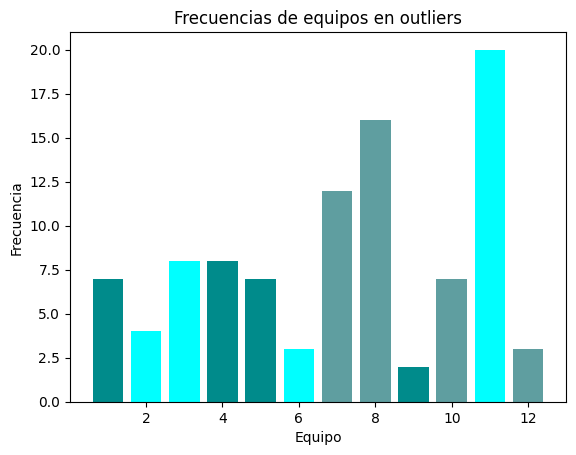

In [18]:
DataFrame.describe()   #  WIP promedio = 1190.465  over_time promedio = 6508.20
grupos = []
for i in range(len(outliers)):
    grupos.append(outliers.iloc[i,4])
frecuencias = {}
for i in range(len(grupos)):
    if grupos[i] in frecuencias:
        frecuencias[grupos[i]]+=1
    else:
        frecuencias[grupos[i]]=1
print(frecuencias)
#print(grupos)
primero = max(frecuencias, key=frecuencias.get)
print(f"El equipo que más aparece en los outliers: {primero}")  
# El team 11 es el que más aparece en el dataset de OUTLIERS 
segundo = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)[1]
print(segundo)
tercero = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)[2]
print(tercero)
import matplotlib.pyplot as plt
eq = frecuencias.keys()
fr = frecuencias.values()
fig,ax = plt.subplots()
ax.bar(eq, fr)
ax.set_title("Frecuencias de equipos en outliers")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Equipo")
colors = ["darkcyan", "cadetblue", "cyan"]
ax.bar(eq, fr, color=colors)
fig.tight_layout
plt.show()


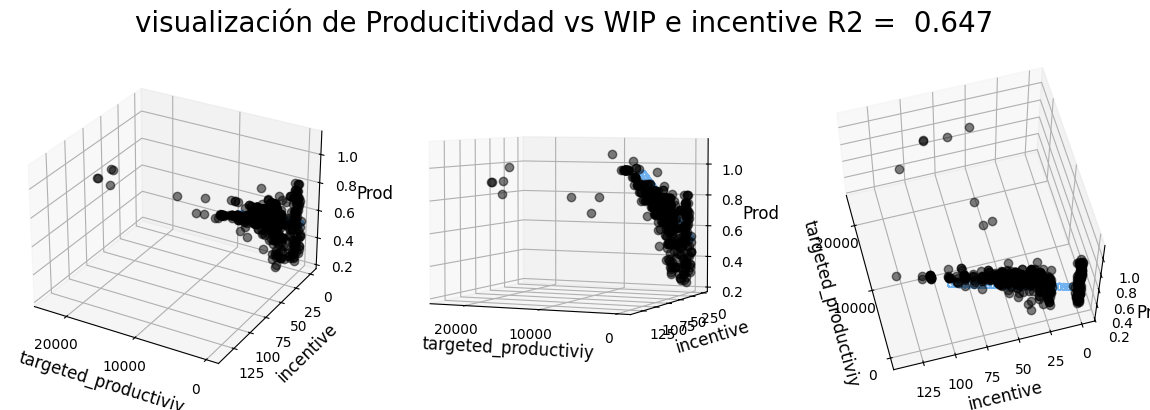

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
DataFrame
X = DataFrame[['wip', 'incentive']].values.reshape(-1,2)
Y = DataFrame['actual_productivity']
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   
y_pred = np.linspace(0, 100, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('targeted_productiviy', fontsize=12)
    ax.set_ylabel('incentive', fontsize=12)
    ax.set_zlabel('Prod', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, '', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, '', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle(f"visualización de Productividad vs WIP e incentive R2 =  {round(r2,3)} ", fontsize=20)

fig.tight_layout()